<h1><center>Polynomial Regression</center></h1>

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [40]:
!pip install xlrd
print ('xlrd installed!')

xlrd installed!


In [41]:
import matplotlib as mpl


## Understanding the Data

### `FuelConsumption.csv`:
We have downloaded a fuel consumption dataset, **`FuelConsumption.csv`**, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. [Dataset source](http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64)

- **MODELYEAR** e.g. 2014
- **MAKE** e.g. Acura
- **MODEL** e.g. ILX
- **VEHICLE CLASS** e.g. SUV
- **ENGINE SIZE** e.g. 4.7
- **CYLINDERS** e.g 6
- **TRANSMISSION** e.g. A6
- **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
- **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
- **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
- **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


## Reading the data in

In [66]:
df_FC = pd.read_excel("FuelConsumption.xlsx")

In [67]:
df_FC.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2004,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.2,7.2,8.3,34,191
1,2004,ACURA,1.7EL,COMPACT,1.7,4,M5,X,9.1,7.3,8.3,34,191
2,2004,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.1,9.0,11.3,25,260
3,2004,ACURA,3.2TL,MID-SIZE,3.2,6,M6,Z,13.2,9.1,11.4,25,262
4,2004,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,14.6,10.7,12.9,22,297


In [68]:
print(type(df_FC.columns))
print(type(df_FC.index))

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.range.RangeIndex'>


In [69]:
df_FC.columns.tolist()
df_FC.index.tolist()   #to get the index and columns as list

print(type(df_FC.columns.tolist()))
print(type(df_FC.index.tolist()))

<class 'list'>
<class 'list'>


In [70]:
df_FC

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2004,ACURA,1.7EL,COMPACT,1.7,4,A4,X,9.2,7.2,8.3,34,191
1,2004,ACURA,1.7EL,COMPACT,1.7,4,M5,X,9.1,7.3,8.3,34,191
2,2004,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.1,9.0,11.3,25,260
3,2004,ACURA,3.2TL,MID-SIZE,3.2,6,M6,Z,13.2,9.1,11.4,25,262
4,2004,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,14.6,10.7,12.9,22,297
...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,2004,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,AS5,Z,14.4,10.2,12.5,23,288
894,2004,VOLVO,V70 T5 TURBO,STATION WAGON - MID-SIZE,2.3,5,M5,Z,13.4,9.8,11.8,24,271
895,2004,VOLVO,XC70 AWD TURBO,SUV,2.5,5,AS5,Z,14.2,10.4,12.5,23,288
896,2004,VOLVO,XC90 2.5T AWD TURBO,SUV,2.5,5,AS5,Z,14.9,10.7,13.0,22,299


In [71]:
cdf = df_FC[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

In [72]:
cdf

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,1.7,4,34,191
1,1.7,4,34,191
2,3.2,6,25,260
3,3.2,6,25,262
4,3.5,6,22,297
...,...,...,...,...
893,2.3,5,23,288
894,2.3,5,24,271
895,2.5,5,23,288
896,2.5,5,22,299


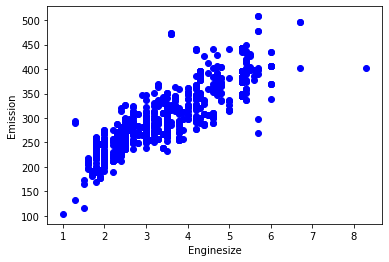

In [73]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Enginesize")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set.

In [75]:
msk = np.random.rand(len(df_FC)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

In essence, we can call all of these, polynomial regression, where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial in x. Lets say you want to have a polynomial regression (let's make 2 degree polynomial):


$y = b + \theta_1  x + \theta_2 x^2$

Now, the question is: how we can fit our data on this equation while we have only x values, such as __Engine Size__? 
Well, we can create a few additional features: 1, $x$, and $x^2$.



__PloynomialFeatures()__ function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, _ENGINESIZE_. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2: 

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])


poly = PolynomialFeatures(degree=2)
train_x_poly = poly.fit_transform(train_x)
train_x_poly

array([[ 1.  ,  1.7 ,  2.89],
       [ 1.  ,  1.7 ,  2.89],
       [ 1.  ,  3.2 , 10.24],
       ...,
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.9 ,  8.41]])

In [77]:
clf = linear_model.LinearRegression()
train_y_ = clf.fit(train_x_poly, train_y)
# The coefficients
print ('Coefficients: ', clf.coef_)
print ('Intercept: ',clf.intercept_)

Coefficients:  [[ 0.         57.02325072 -1.58699009]]
Intercept:  [126.36421772]


Text(0, 0.5, 'Emission')

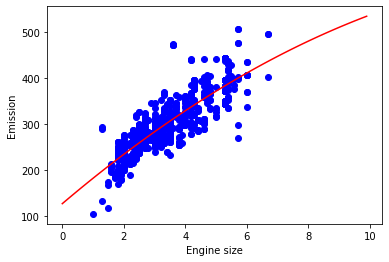

In [78]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

<h2 id="evaluation">Evaluation</h2>

In [81]:
from sklearn.metrics import r2_score

test_x_poly = poly.fit_transform(test_x)
test_y_ = clf.predict(test_x_poly)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 24.02
Residual sum of squares (MSE): 1077.20
R2-score: 0.63


<h2 id="practice">Practice</h2>
Try to use a polynomial regression with the dataset but this time with degree three (cubic). Does it result in better accuracy?

Coefficients:  [[  0.         108.40809239 -16.36316893   1.31686622]]
Intercept:  [71.71302306]
Mean absolute error: 25.07
Residual sum of squares (MSE): 1265.13
R2-score: 0.60


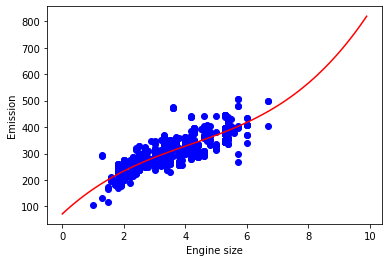

In [82]:
poly3 = PolynomialFeatures(degree=3)
train_x_poly3 = poly3.fit_transform(train_x)
clf3 = linear_model.LinearRegression()
train_y3_ = clf3.fit(train_x_poly3, train_y)
# The coefficients
print ('Coefficients: ', clf3.coef_)
print ('Intercept: ',clf3.intercept_)
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf3.intercept_[0]+ clf3.coef_[0][1]*XX + clf3.coef_[0][2]*np.power(XX, 2) + clf3.coef_[0][3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")
test_x_poly3 = poly3.fit_transform(test_x)
test_y3_ = clf3.predict(test_x_poly3)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y3_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y3_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y3_ , test_y) )